In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
data_head = pd.read_csv("./DataSets/headbrain.csv")
data_head.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
X = data_head[["Gender","Age Range","Head Size(cm^3)"]]
Y = data_head[["Brain Weight(grams)"]]

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((189, 3), (48, 3), (189, 1), (48, 1))

In [6]:
linreg = LinearRegression()
model = linreg.fit(X_train,Y_train)

In [7]:
y_pred = model.predict(X_test)

In [14]:
model.coef_ #a1

array([[-15.10813997, -27.67412051,   0.24252694]])

In [9]:
model.intercept_   #a0

array([465.9877711])

In [10]:
import numpy as np
np.sqrt(mean_squared_error(Y_test,y_pred))

71.23878018173185

In [11]:
r2_score(Y_test,y_pred)

0.6463914618720078

In [17]:
ls = []
for i in linreg.coef_:
    ls.append(i)
ls

[array([-15.10813997, -27.67412051,   0.24252694])]

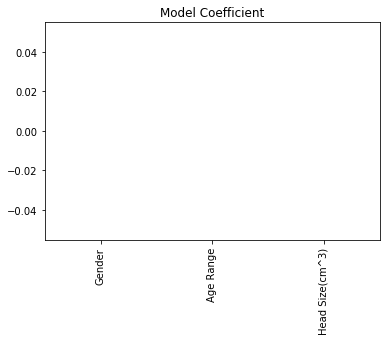

In [16]:
predictors = X_train.columns
coef1 = pd.Series(coef, predictors)
coef1.plot(kind="bar", title = "Model Coefficient")
plt.show()

# Residual Plot

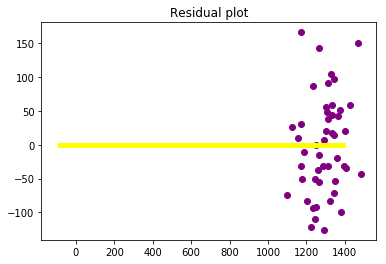

In [53]:
#resudual plot
plt.scatter(y_pred, ( Y_test - y_pred ), color='purple')
plt.hlines(y=0, xmin= -100, xmax=1400,linewidth=5,color="yellow")

plt.title('Residual plot')
plt.show()

In [48]:

a = np.array([4000,2000]).reshape(2,-1)
a

array([[4000],
       [2000]])

# 3D Plot

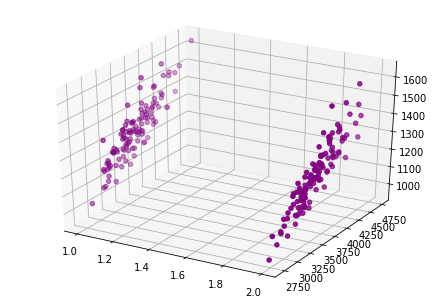

In [51]:
from mpl_toolkits.mplot3d import Axes3D
fig =plt.figure()
ax = Axes3D(fig)
ax.scatter(data_head["Age Range"].values, data_head["Head Size(cm^3)"].values,data_head["Brain Weight(grams)"].values,
           color="purple")
plt.show()

In [14]:
pred = model.predict(a)

In [15]:
pred

array([[1379.29077901],
       [ 852.43210003]])

# ==============================================================

In [16]:
sal_data = pd.read_csv("./DataSets/Salary_Data.csv")
sal_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [17]:
len(sal_data)

30

In [18]:
Y = sal_data[["Salary"]]
X = sal_data[["YearsExperience"]]

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [20]:
linreg2 = LinearRegression()

model2 = linreg2.fit(X_train, Y_train)

In [21]:
y_pred2 = model2.predict(X_test)

Y_test["prediction"] = y_pred2
Y_test

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Salary,prediction
2,37731.0,40748.961841
28,122391.0,122699.622956
13,57081.0,64961.657170
10,63218.0,63099.142145
26,116969.0,115249.562855
24,109431.0,107799.502753


In [22]:
rmse = np.sqrt(mean_squared_error(Y_test["Salary"],y_pred2))
rmse

3580.979237321343

In [32]:
r2 = model2.score(X_test,Y_test["Salary"])

In [33]:
r2

0.988169515729126

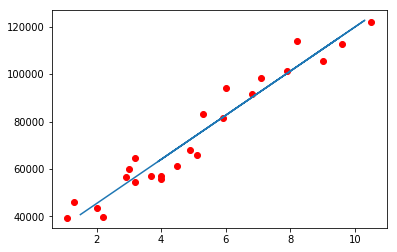

In [28]:
plt.scatter(X_train,Y_train,color="red")
plt.plot(X_test,y_pred2)
plt.show()

In [26]:
model2.coef_

array([[9312.57512673]])

In [27]:
model2.intercept_

array([26780.09915063])

In [29]:
from sklearn.metrics import r2_score

In [31]:
r2_score(X_test,Y_test["Salary"])

-751251043.6830878